# Evaluate Models

This notebook is used to evaluate and compare the results of the different models

In [1]:
import os

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import json

In [2]:
repo_path = os.path.dirname(os.path.abspath(''))
src_path = os.path.join(repo_path, 'src')
eval_path = os.path.join(repo_path, 'presentation', 'evaluation')
print(repo_path)
print(src_path)

/home/ujrgt/lama/itw_lama_group8
/home/ujrgt/lama/itw_lama_group8/src


### Get the Results of the Models

In [3]:
models = ['alexnet', 'resnet18', 'shufflenet']
class_names = ['Traffic Sign', 'Building', 'Fence', 'Other', 'Pedestrian', 'Pole', 'Road Line','Road', 'Sidewalk', 'Vegetation', 'Car', 'Wall']

f = open(src_path + '/models/alexnet/results.json')
alexnet = json.load(f)
f = open(src_path + '/models/resnet18/results.json')
resnet = json.load(f)
f = open(src_path + '/models/shufflenet/results.json')
shufflenet = json.load(f)
f = open(src_path + '/models/resnet18/results_weighted-loss.json')
resnet_weighted = json.load(f)
f = open(src_path + '/models/shufflenet/results_weighted-loss.json')
shufflenet_weighted = json.load(f)

In [4]:
data_accuracy_mean = [alexnet['accuracy_mean'],resnet['accuracy_mean'], shufflenet['accuracy_mean']]
data_accuracy = [alexnet['accuracy'],resnet['accuracy'], shufflenet['accuracy']]
data_recall_classwise = {'alexnet' : alexnet['classwise_recall'],'resnet':resnet['classwise_recall'], 'shufflenet':shufflenet['classwise_recall']}
data_runtime = [alexnet['model_runtime'],resnet['model_runtime'], shufflenet['model_runtime']]
data_params = [alexnet['total_params'][0],resnet['total_params'][0], shufflenet['total_params'][0]]
weighted_data_accuracy_mean = [resnet_weighted['accuracy_mean'], shufflenet_weighted['accuracy_mean']]
weighted_data_accuracy = [resnet_weighted['accuracy'], shufflenet_weighted['accuracy']]
weighted_data_recall_classwise = {'resnet_weighted':resnet_weighted['classwise_recall'], 'shufflenet_weighted':shufflenet_weighted['classwise_recall']}
weighted_data_precision_classwise = {'resnet_weighted_prec' : resnet_weighted['classwise_precision']}
data_precision_classwise = {'resnet_prec' : resnet['classwise_precision']}

### Compare the Models

#### Plot the Accuracies

In [5]:
color1, color2, color3 = (20/255,74/255,137/255, 0.8), (31/255, 183/255, 121/255,0.8),(253/255, 231/255, 37/255, 0.8)
color1_scaled, color2_scaled, color3_scaled = (20,74,137), (31, 183, 121),(253, 231, 37)
sns.set_palette([color1, color2, color3])

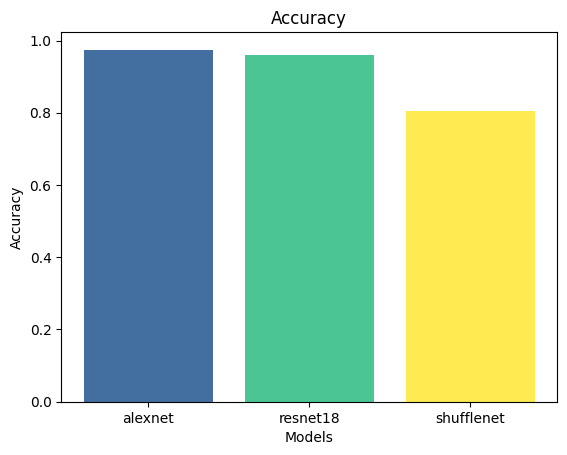

In [6]:
plt.title("Accuracy")
plt.bar(models,data_accuracy_mean, label = 'Accuracy', color=[color1, color2, color3])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.savefig(os.path.join(eval_path, 'models_mean_accuracy'), bbox_inches = "tight")
plt.show()

#### Plot a Boxplot of the Accuracies

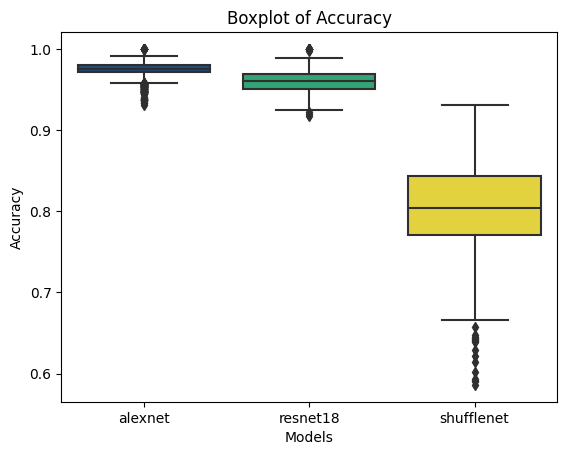

In [7]:
fig, ax = plt.subplots()

ax = sns.boxplot(data_accuracy)
ax.set_xticklabels(models)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Models')
ax.set_title('Boxplot of Accuracy')
plt.savefig(os.path.join(eval_path, 'models_accuracy_boxplot'), bbox_inches = "tight")
plt.show()

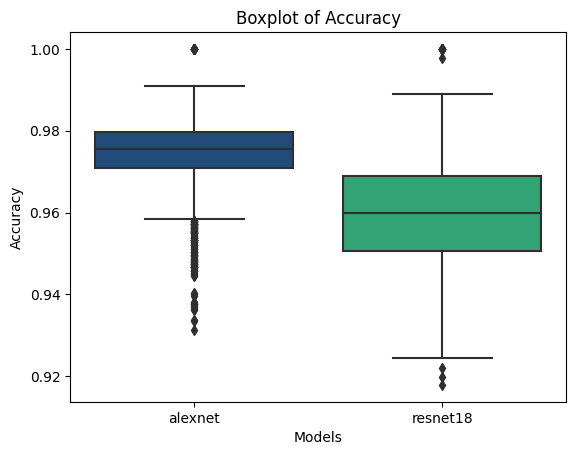

In [8]:
fig, ax = plt.subplots()

ax = sns.boxplot(data_accuracy[:-1])
ax.set_xticklabels(models[:-1])
ax.set_ylabel('Accuracy')
ax.set_xlabel('Models')
ax.set_title('Boxplot of Accuracy')
plt.savefig(os.path.join(eval_path, 'alex_res_accuracy'), bbox_inches = "tight")
plt.show()

#### Plot a Violinplot of the Accuracies

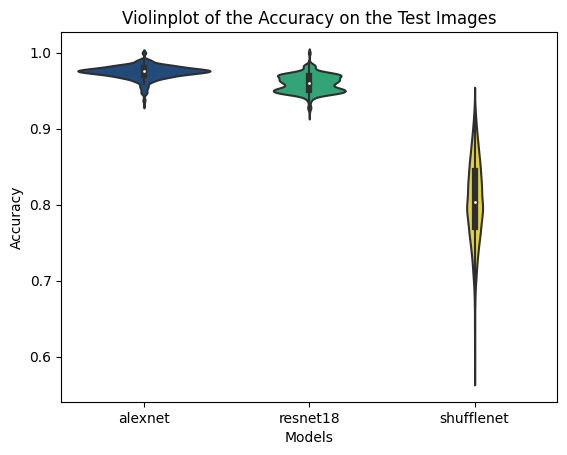

In [9]:
ax = sns.violinplot(data=data_accuracy);
ax.set_xticklabels(models)
ax.set_title('Violinplot of the Accuracy on the Test Images') 
ax.set_ylabel('Accuracy')
ax.set_xlabel('Models')
plt.savefig(os.path.join(eval_path, 'models_accuracy_violin'), bbox_inches = "tight")
plt.show()

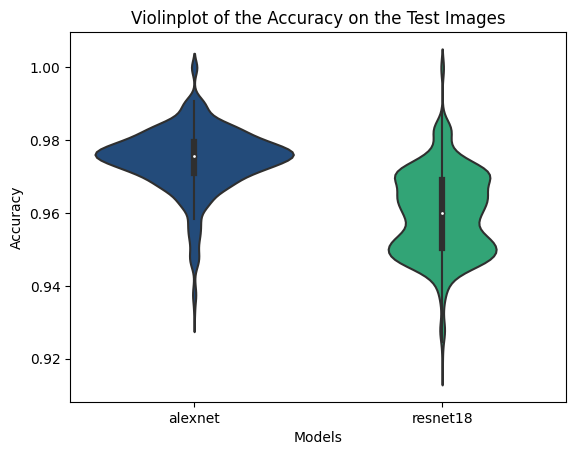

In [10]:
ax = sns.violinplot(data=data_accuracy[:-1]);
ax.set_xticklabels(models[:-1])
ax.set_title('Violinplot of the Accuracy on the Test Images') 
ax.set_ylabel('Accuracy')
ax.set_xlabel('Models')
plt.savefig(os.path.join(eval_path, 'alex_res_accuracy_violin'), bbox_inches = "tight")
plt.show()


#### Plot the Runtimes

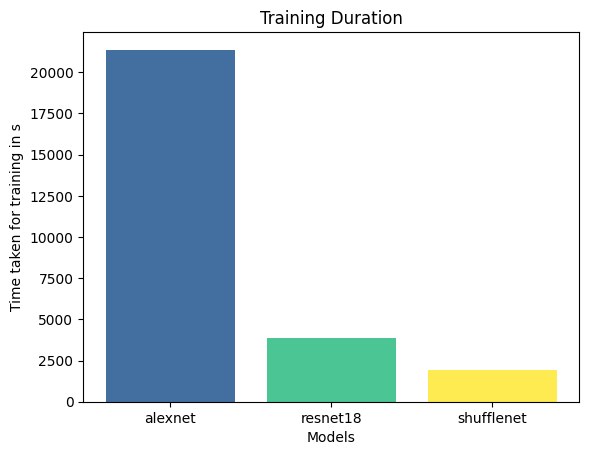

In [11]:
plt.title("Training Duration")
plt.bar(models,data_runtime , label = 'Runtime', color=[color1, color2, color3])
plt.xlabel('Models')
plt.ylabel('Time taken for training in s')
plt.savefig(os.path.join(eval_path, 'training_duration'), bbox_inches = "tight")
plt.show()

#### Plot the Amount of Parameters

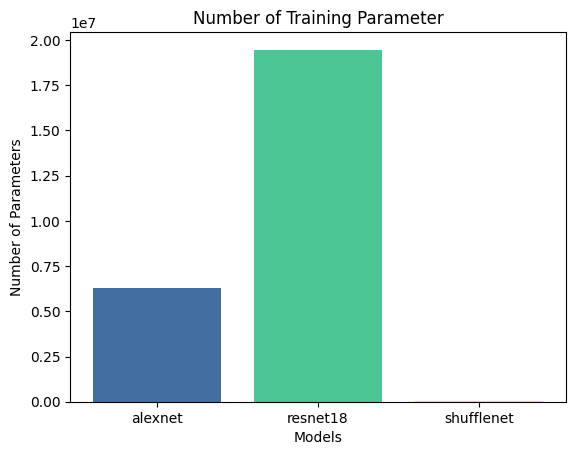

In [12]:
plt.title("Number of Training Parameter")
plt.bar(models,data_params, label = 'Runtime', color=[color1, color2, color3])
plt.xlabel('Models')
plt.ylabel('Number of Parameters')
plt.savefig(os.path.join(eval_path, 'number_of_params'), bbox_inches = "tight")
plt.show()


### Plot the classwise Recalls and Precisions

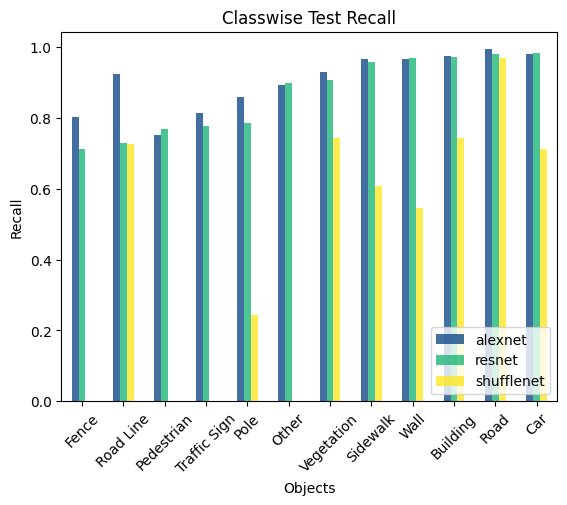

In [13]:
df = pd.DataFrame(data_recall_classwise, index=class_names)
df = df.sort_values(by=['resnet'])
df[['alexnet', 'resnet', 'shufflenet']].plot.bar(rot=45, title="Classwise Test Recall", color=[color1, color2, color3])
plt.legend(loc='lower right')
plt.xlabel('Objects')
plt.ylabel('Recall')
plt.savefig(os.path.join(eval_path, 'all_models_classwise_recall'), bbox_inches = "tight")
plt.show()

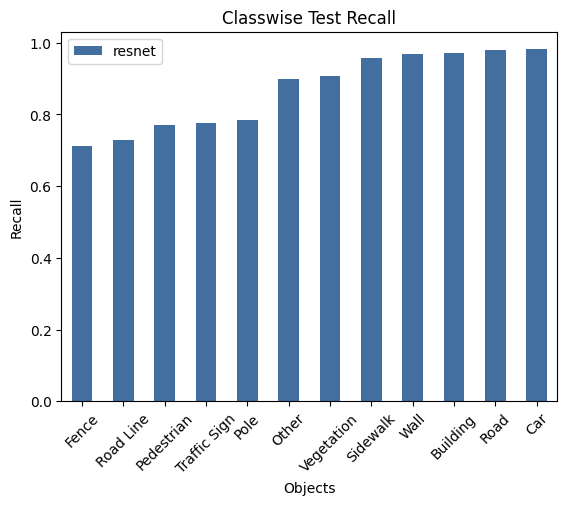

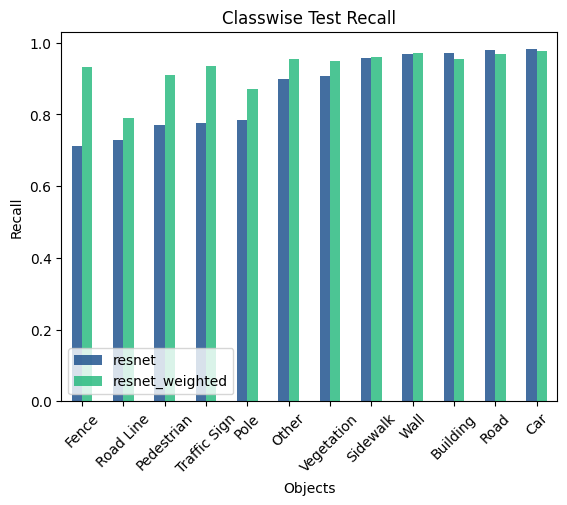

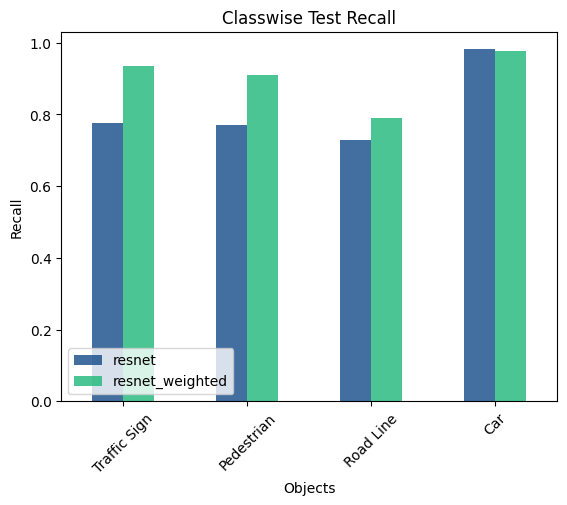

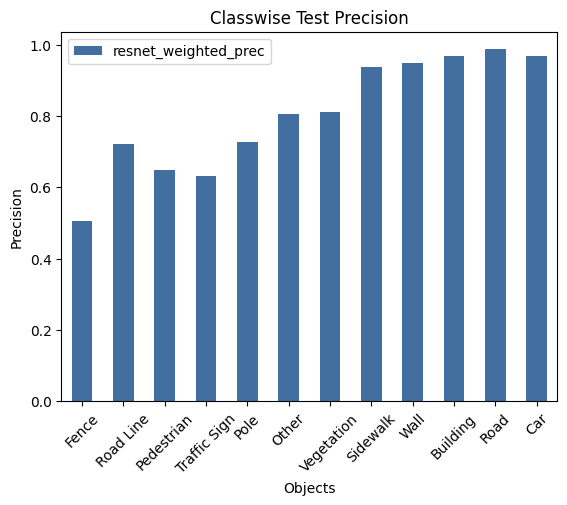

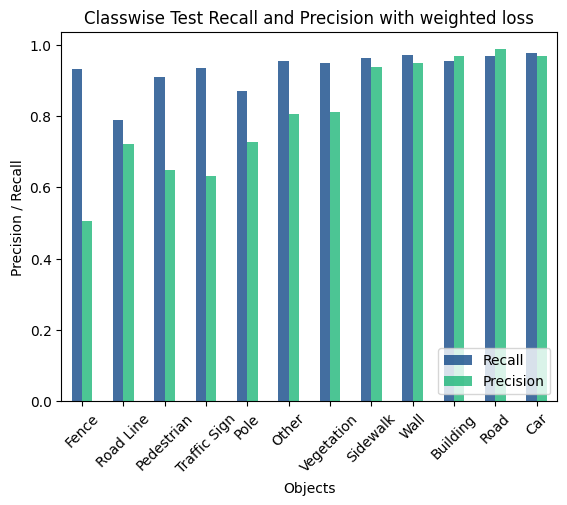

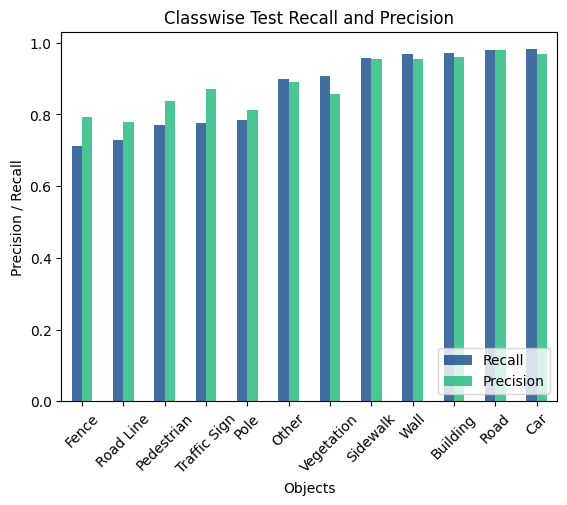

In [14]:
data_recall_classwise.update(weighted_data_recall_classwise)
data_recall_classwise.update(weighted_data_precision_classwise)
data_recall_classwise.update(data_precision_classwise)
df = pd.DataFrame(data_recall_classwise, index=class_names)
df = df.sort_values(by=['resnet'])
df[['resnet']].plot.bar(rot=45, title="Classwise Test Recall", color=[color1, color2, color3])
plt.xlabel('Objects')
plt.ylabel('Recall')
plt.savefig(os.path.join(eval_path, 'resnet_classwise_recall'), bbox_inches = "tight")
plt.show()
df[['resnet', 'resnet_weighted']].plot.bar(rot=45, title="Classwise Test Recall", color=[color1, color2, color3])
plt.legend(loc='lower left')
plt.xlabel('Objects')
plt.ylabel('Recall')
plt.savefig(os.path.join(eval_path, 'resnet_weighted_and_normal_classwise_recall'), bbox_inches = "tight")
plt.show()
df[['resnet', 'resnet_weighted']].loc(axis=0)['Traffic Sign', 'Pedestrian' ,'Road Line', 'Car'].plot.bar(rot=45, title="Classwise Test Recall", color=[color1, color2, color3])
plt.legend(loc='lower left')
plt.xlabel('Objects')
plt.ylabel('Recall')
plt.savefig(os.path.join(eval_path, 'exemplar_resnet_weighted_and_normal_classwise_recall'), bbox_inches = "tight")
plt.show()
df[['resnet_weighted_prec']].plot.bar(rot=45, title="Classwise Test Precision", color=[color1, color2, color3])
plt.xlabel('Objects')
plt.ylabel('Precision')
plt.savefig(os.path.join(eval_path, 'resnet_classwise_precision'), bbox_inches = "tight")
plt.show()
df[['resnet_weighted', 'resnet_weighted_prec']].plot.bar(rot=45, title="Classwise Test Recall and Precision with weighted loss", color=[color1, color2, color3])
plt.xlabel('Objects')
plt.ylabel('Precision / Recall')
plt.legend(['Recall', 'Precision'], loc='lower right')
plt.savefig(os.path.join(eval_path, 'resnet_classwise_recall_and_precision_weighted'), bbox_inches = "tight")
plt.show()
df[['resnet', 'resnet_prec']].plot.bar(rot=45, title="Classwise Test Recall and Precision", color=[color1, color2, color3])
plt.xlabel('Objects')
plt.ylabel('Precision / Recall')
plt.legend(['Recall', 'Precision'], loc='lower right')
plt.savefig(os.path.join(eval_path, 'resnet_classwise_recall_and_precision'), bbox_inches = "tight")
plt.show()

